In [1]:
import os
import sys
sys.path.insert(0, "../") # uncomment to work with local copy
import diffusive_solver as df
print(df.__version__)

3.0rc8


In [2]:
output_folder = 'testing_results/thermoelectric'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [3]:
from diffusive_solver import *

In [4]:
geometry = Geometry.from_points(points_coords =[[-3,1],[-3,0],[3,0],[3,1]], 
                                contacts_positions = [[0,1],[2,3]], 
                                resolution = 20)

Total volume = 5.999999999999998
Total area = 14.0
Contact 1 with area = 1.0
Contact 2 with area = 1.0


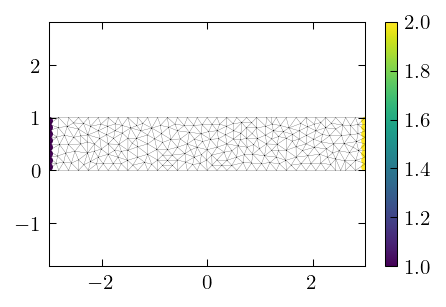

In [5]:
geometry.plot()
plt.colorbar()
geometry.check_dimensions()

In [6]:
cc = Matrix_Expression([[1.,0],
                        [0,1.]], 
                       dimension = 2, scalar = False)
tt = Matrix_Expression(2.)
ct = Matrix_Expression([[lambda x, y: np.tanh(x),lambda x, y: 0.],
                        [lambda x, y: 0.,lambda x, y: np.tanh(x)]], 
                       dimension = 2, scalar = False, mesh = geometry.mesh)

L = [[cc,ct],
     [ct,tt]]

Gamma = [[Matrix_Expression(0),Matrix_Expression(0)],
         [Matrix_Expression(0),Matrix_Expression(5)]]

F = [Matrix_Expression(0), 
     Matrix_Expression(lambda x, y: np.exp(-10*(x-1)**2-10*(y-0.2)**2), 
                       mesh = geometry.mesh, dimension = 1,)]

In [7]:
ct.plot(i = 0, j = 0,cmap = 'hot')
plt.colorbar()

In [8]:
problem = Problem(geometry = geometry, n_fields = 2, self_adjoint = True,
                  L = L, 
                  Gamma = Gamma, 
                  F = F,
                  biases = [[1.,0.], [0.,0.]]) 
problem.solve()

In [9]:
problem.fluxes

array([[-0.16440208,  0.16440371],
       [ 0.16039974,  0.16398522]])

In [10]:
problem.response_matrix
problem.source_vector

array([[-0.00385725,  0.00385881],
       [ 0.00388507,  0.00746305]])

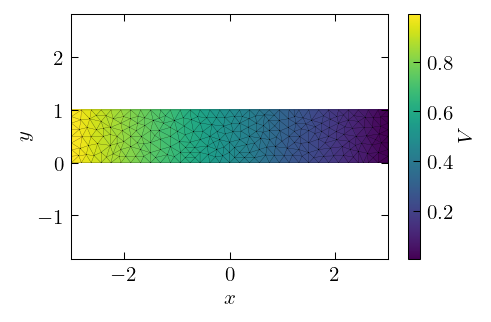

In [11]:
problem.plot_field(field = 0)
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('$V$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig(output_folder + '/2a.pdf')

In [12]:
problem.plot_field(field = 1)
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('$\delta T/T_0$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig(output_folder + '/2b.pdf')

In [13]:
x = np.linspace(-3,3)
for yi in np.linspace(0,1,num=3):   
    plt.plot(x,[problem.fields[1](xi,yi) for xi in x])
plt.xlabel('$x$')
plt.ylabel('$\delta T/T_0$')
plt.savefig(output_folder + '/3a.pdf')

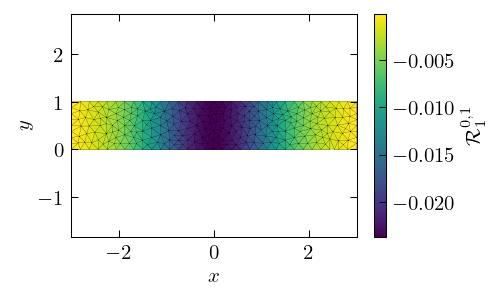

In [14]:
plt.figure()
plt.axis('equal')

problem.plot_responsivity(flux = 0,contact = 1, source = 1)
cb = plt.colorbar()
cb.set_label('${\cal R}^{0,1}_1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.savefig(output_folder + '/3b.pdf')

In [15]:
problem.save(folder = output_folder, file_format = 'xdmf')